In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/fraud-detection/synth_composite.csv


## Import Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

sns.set_theme()
sns.set_style("darkgrid")

## Load dataset

In [3]:
df = pd.read_csv('../input/fraud-detection/synth_composite.csv')

### Show some stats

In [4]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,211,CASH_OUT,184185.755277,160_2696646_0,203108.476051,18922.720773,160_901564_0,1.019994e+06,1.204127e+06,0,0
1,394,CASH_OUT,237093.196009,160_5585569_0,382707.464238,145614.268230,160_1586945_0,5.870893e+05,8.243203e+05,0,0
2,306,CASH_IN,163600.518794,160_4221372_0,3093.431169,0.000000,160_1701821_0,6.534538e+05,4.901219e+05,0,0
3,235,PAYMENT,7625.866018,160_3064357_0,74630.853812,67004.987793,160_1304279_0,1.666019e+01,1.362096e+01,0,0
4,235,PAYMENT,7866.992466,160_5544127_0,74632.326454,66765.333988,160_2370260_0,5.390545e+00,9.820910e+00,0,0
5,493,CASH_OUT,281403.795998,160_6037426_0,42235.923347,0.000000,160_2092767_0,5.880235e+05,8.693219e+05,0,0
6,18,PAYMENT,4355.986182,160_400626_0,56160.034248,51804.048066,160_175474_0,8.496485e+00,1.078249e+01,0,0
7,550,CASH_IN,102079.164541,160_6146482_0,15781.717821,0.000000,160_354507_0,4.064748e+06,3.962757e+06,0,0
8,284,CASH_OUT,144074.648278,160_3889478_0,197270.864524,53196.216246,160_1089660_0,1.097389e+06,1.241346e+06,0,0
9,132,CASH_OUT,142367.900524,160_1163767_0,0.185064,0.000000,160_29365_0,2.424877e+06,2.567106e+06,0,0


In [5]:
df.shape

(6362620, 11)

In [6]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [7]:
df['isFlaggedFraud'].value_counts()

0    6362606
1         14
Name: isFlaggedFraud, dtype: int64

In [8]:
df[df['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6354407,741,CASH_OUT,2.00,161_8178_0,-71.00,-73.0,161_8134_0,2.700696e+05,2.702828e+05,1,0
6354408,212,CASH_OUT,362998.52,161_2386_0,363050.52,52.0,161_2374_0,2.159733e+06,2.523959e+06,1,0
6354409,568,CASH_OUT,66187.66,161_6282_0,66125.66,-62.0,161_6251_0,7.177089e+05,7.832872e+05,1,0
6354410,15,CASH_OUT,696771.08,161_168_0,696771.08,0.0,161_167_0,3.688858e+05,1.351356e+06,1,0
6354411,501,CASH_OUT,73332.47,161_5584_0,73285.47,-47.0,161_5556_0,1.253682e+05,1.923281e+05,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,483,CASH_OUT,22982.73,161_5384_0,22981.73,-1.0,161_5356_0,3.279893e+06,3.304007e+06,1,0
6362616,214,CASH_OUT,1368390.50,161_2420_0,1368453.50,63.0,161_2408_0,2.589394e+05,1.624944e+06,1,0
6362617,679,CASH_OUT,3150440.28,161_7476_0,3150454.28,14.0,161_7437_0,6.372507e+03,3.157667e+06,1,0
6362618,482,CASH_OUT,75655.33,161_5366_0,75647.33,-8.0,161_5338_0,8.529471e+05,9.285452e+05,1,0


In [9]:
df[df['isFraud']==1].index[-1] - df[df['isFraud']==1].index[0]

8212

--> The last rows in the df are labeled as fraud

In [10]:
df_10 = df.sample(frac=0.1)

In [11]:
df_10['isFraud'].value_counts()

0    635402
1       860
Name: isFraud, dtype: int64

In [12]:
df_10.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
24246,323,CASH_OUT,66563.911400,160_4431166_0,11471.891106,0.000000,160_328493_0,153225.255118,219605.492869,0,0
656669,130,PAYMENT,8830.998618,160_2113249_0,271608.038045,262777.039427,160_898104_0,4.202699,2.815006,0,0
5510321,37,PAYMENT,6680.315764,160_730633_0,288867.126745,282186.810981,160_313681_0,9.730429,3.066732,0,0
2937945,298,TRANSFER,21630.320145,160_3994973_0,0.777719,0.000000,160_1710939_0,93811.915522,115314.530441,0,0
525380,283,CASH_IN,46917.306127,160_3854713_0,10892.743449,0.000000,160_202627_0,61017.799257,14115.185345,0,0


In [13]:
df_10['type'].value_counts()

CASH_OUT    224460
PAYMENT     214928
CASH_IN     139117
TRANSFER     53583
DEBIT         4174
Name: type, dtype: int64

In [14]:
df_10['type'].value_counts().index

Index(['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'], dtype='object')

Text(0.5, 1.0, 'Type of transaction')

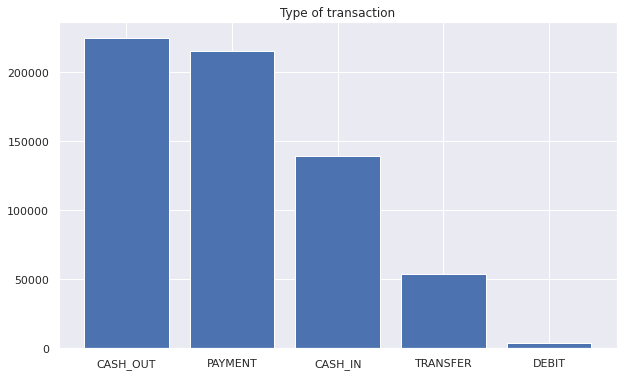

In [15]:
fig = plt.figure(figsize=(10,6))
x = df_10['type'].value_counts().index
y = df_10['type'].value_counts()
plt.bar(x,y)
plt.title('Type of transaction')

In [16]:
df_10.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [17]:
df_10.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [18]:
df_10['nameOrig'].value_counts()

160_1449445_0    2
160_1771492_0    2
160_1244287_0    2
160_498558_0     2
160_2106405_0    2
                ..
160_4523822_0    1
160_1682368_0    1
160_2104631_0    1
160_1120642_0    1
160_4224798_0    1
Name: nameOrig, Length: 636160, dtype: int64

### LabelEncode object typed columns to get numeric data for them

In [19]:
le = LabelEncoder()
df_10_le = df_10.copy()

for i_col in df_10_le.columns:
    if df_10_le[i_col].dtype == "object":
        labels = df_10_le[i_col].astype(str).values
        le.fit(labels)
        df_10_le[i_col] = le.transform(df_10_le[i_col])

In [20]:
df_10_le.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
24246,323,1,66563.911400,382166,11471.891106,0.000000,298411,153225.255118,219605.492869,0,0
656669,130,3,8830.998618,124173,271608.038045,262777.039427,435048,4.202699,2.815006,0,0
5510321,37,3,6680.315764,605347,288867.126745,282186.810981,294063,9.730429,3.066732,0,0
2937945,298,4,21630.320145,333807,0.777719,0.000000,134165,93811.915522,115314.530441,0,0
525380,283,0,46917.306127,318175,10892.743449,0.000000,186722,61017.799257,14115.185345,0,0


## Import isolation forest

In [21]:
from sklearn.ensemble import IsolationForest

In [22]:
%%time
model = IsolationForest(contamination=0.01, n_estimators=1000)
model.fit(df_10_le)

CPU times: user 3min 15s, sys: 28.2 s, total: 3min 43s
Wall time: 3min 43s


IsolationForest(contamination=0.01, n_estimators=1000)

### Predict Outliers for current dataset

In [23]:
df_10.reset_index(inplace=True)

In [24]:
df_10['iForest'] = pd.Series(model.predict(df_10_le))
df_10['iForest'].value_counts()

 1    629899
-1      6363
Name: iForest, dtype: int64

In [25]:
df_10[df_10['isFraud']==1]

,index,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,iForest
361,6361306,225,TRANSFER,232575.37,161_6613_0,232618.37,43.0,161_6579_0,3.532442e+03,1.685606e+02,1,0,1
945,6359164,636,TRANSFER,38140.22,161_2345_0,38140.22,0.0,161_2333_0,1.518564e+03,1.977196e+01,1,0,1
1322,6359393,385,TRANSFER,2291497.65,161_2803_0,2291425.65,-72.0,161_2791_0,5.126491e+03,6.056990e+02,1,0,1
6729,6360391,247,TRANSFER,209821.57,161_4787_0,209911.57,90.0,161_4761_0,4.829518e+03,1.528516e+03,1,0,1
6864,6355063,563,CASH_OUT,96996.06,161_6218_0,96933.06,-63.0,161_6188_0,1.110682e+06,1.211398e+06,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
632728,6362334,228,CASH_OUT,4526739.52,161_2570_0,4526827.52,88.0,161_2558_0,4.162533e+05,4.941481e+06,1,0,-1
633542,6357278,250,CASH_OUT,52787.24,161_2826_0,52709.24,-78.0,161_2813_0,6.034581e+04,1.109794e+05,1,0,1
634238,6358944,281,TRANSFER,46071.33,161_1904_0,46140.33,69.0,161_1892_0,1.221340e+03,9.092134e+02,1,0,1
635142,6361875,216,TRANSFER,342678.47,161_7741_0,342638.47,-40.0,161_7701_0,1.295741e+03,3.830435e+03,1,0,1


### Portion of labeled Frauds which is detected as Fraud and vice versa

In [26]:
frauds_detected = df_10['iForest'][df_10['isFraud']==1].value_counts()


In [27]:
part_detected_frauds = frauds_detected[-1] / frauds_detected[1]
print(f"{part_detected_frauds*100:.3g} % of frauds have been detected (True positive), so {(1-part_detected_frauds)*100:.3g} % have not been detected (False negative)")

20.3 % of frauds have been detected (True positive), so 79.7 % have not been detected (False negative)


In [28]:
part_frauds_in_frauDetected = df_10['isFraud'][df_10['iForest']==-1].value_counts(normalize=True)
print(f"{part_frauds_in_frauDetected[0]*100:.3g} % of the detected frauds are no outliers (False positive), and {part_frauds_in_frauDetected[1]*100:.3g} % of detected outliers are real outliers (True negative)")

97.7 % of the detected frauds are no outliers (False positive), and 2.28 % of detected outliers are real outliers (True negative)


In [29]:
part_frauds = df_10['isFraud'].value_counts(normalize=True)
part_frauds

0    0.998648
1    0.001352
Name: isFraud, dtype: float64

In [30]:
print(f"The part of frauds in the original dataset has been {part_frauds[1]*100:.3g} %")

The part of frauds in the original dataset has been 0.135 %
